In [1]:
import sys
from random import random
sys.path.append('../')

In [2]:
from moed.model import Sequence, Model
from moed.analysis import Analysis
from moed.proc import Proc

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x = range(100)

In [5]:
line = Sequence.from_func(x, lambda x: random())
const = Sequence.from_func(x, lambda x: 5)

In [6]:
skewed = line + const

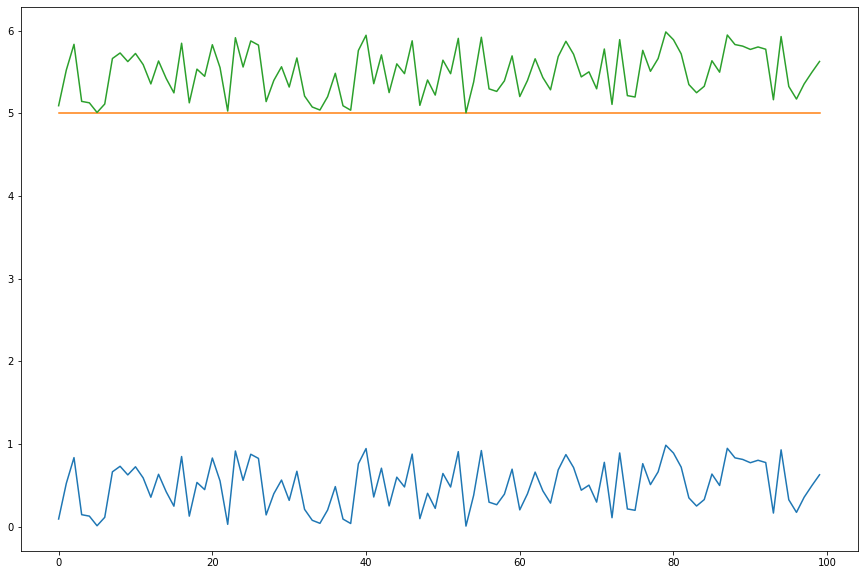

In [7]:
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(x, line.y)
axes.plot(x, const.y)
axes.plot(x, skewed.y)
plt.show()

In [9]:
avg = Analysis.avg(skewed)
compensated = skewed - avg
compensated2 = Proc.unshift(skewed)

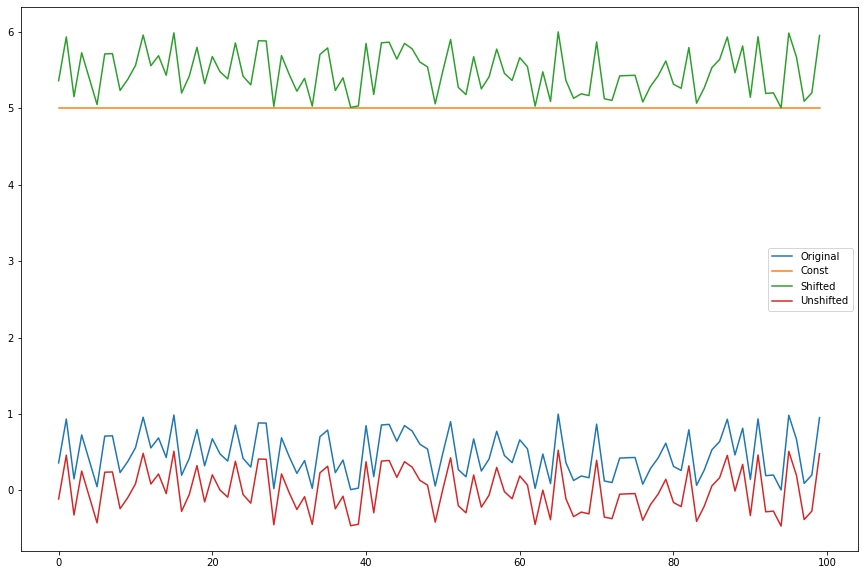

In [12]:
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(x, line.y, label="Original")
axes.plot(x, const.y, label="Const")
axes.plot(x, skewed.y, label="Shifted")
axes.plot(x, compensated.y, label="Unshifted")
axes.legend()
plt.show()

In [13]:
from collections import OrderedDict
import copy

l = list(copy.copy(line.y))
spiked = Proc.spikes(l, 5, 30)
spiked = Sequence.from_dict(OrderedDict(zip(line.x, spiked)))
unspiked = Proc.unspike(spiked, 5)

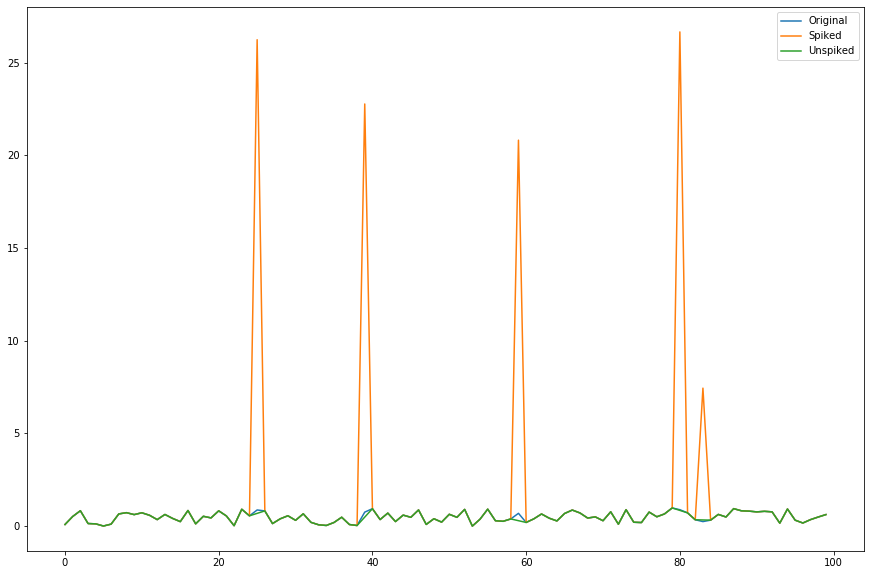

In [14]:
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(x, line.y, label="Original")
axes.plot(x, spiked.y, label="Spiked")
axes.plot(x, unspiked.y, label="Unspiked")
axes.legend()
plt.show()

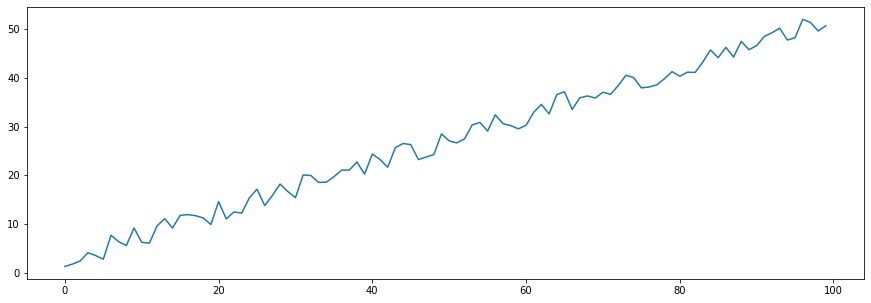

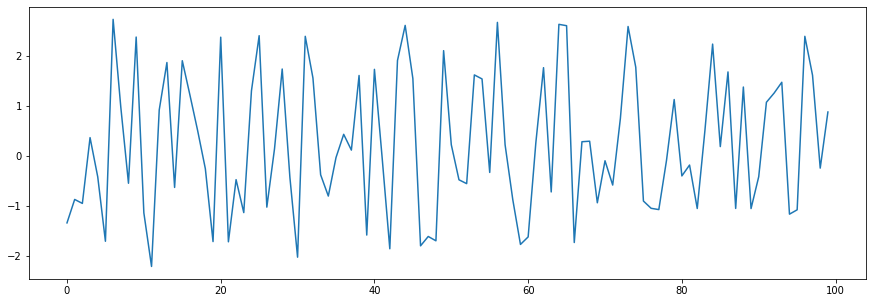

In [12]:
data = Model.linear(x, 0.5, 0) + Sequence.from_func(x, lambda x: random()*5)
untrend = Proc.untrend(data)

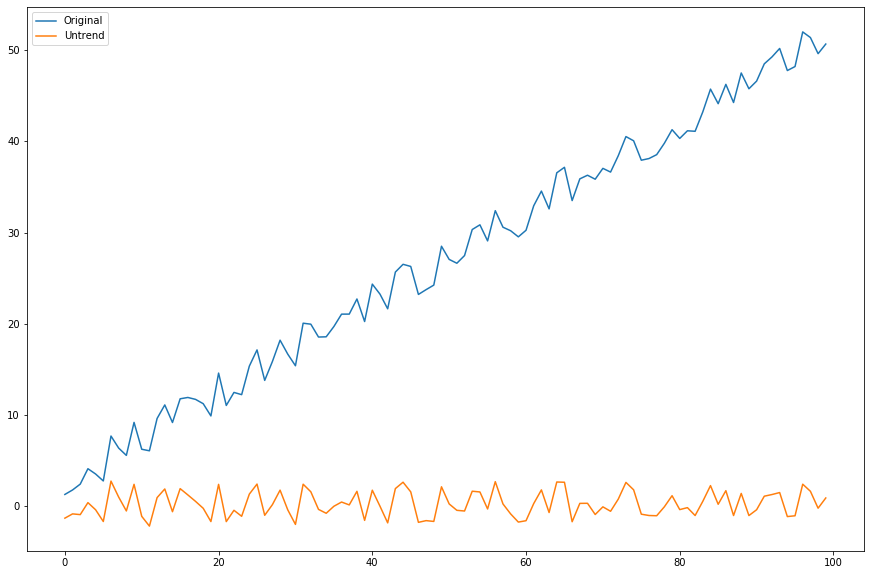

In [13]:
fig, axes = plt.subplots(1, figsize=(15, 10))
axes.plot(x, data.y, label="Original")
axes.plot(x, untrend.y, label="Untrend")
axes.legend()
plt.show()